# Métodos de busca unidimensional

In [1]:
import numpy as np
import pandas as pd

## Método da Seção Áurea

In [2]:
def f(x):
    return 3 - 20*x + 20*x**2

In [3]:
q = 0.618

def y(a, b):
    return a + (1 - q)*(b - a)
def z(a, b):
    return a + q*(b - a)

def otimizar(f, a, b, numero_iteracoes=10):
    a_k = a
    b_k = b

    y_k = y(a_k, b_k)
    z_k = z(a_k, b_k)
    
    for k in range(numero_iteracoes):
        if f(y_k) <= f(z_k):
            a_k = a_k
            b_k = z_k
            z_k = y_k
            y_k = y(a_k, b_k)
        else:
            a_k = y_k
            b_k = b_k
            y_k = z_k
            z_k = z(a_k, b_k)

    return a_k, b_k

In [4]:
otimizar(f, 0, 2)

(0.4884257099963061, 0.5046961822911469)

In [5]:
q = 0.618

def y(a, b):
    return a + (1 - q)*(b - a)
def z(a, b):
    return a + q*(b - a)

def otimizar(f, a, b, numero_iteracoes=10):
    a_ = np.zeros(numero_iteracoes+1)
    b_ = np.zeros(numero_iteracoes+1)
    y_ = np.zeros(numero_iteracoes+1)
    z_ = np.zeros(numero_iteracoes+1)
    
    a_[0] = a
    b_[0] = b

    y_[0] = y(a_[0], b_[0])
    z_[0] = z(a_[0], b_[0])
    
    for k in range(numero_iteracoes):
        if f(y_[k]) <= f(z_[k]):
            a_[k+1] = a_[k]
            b_[k+1] = z_[k]
            y_[k+1] = y(a_[k+1], b_[k+1])
            z_[k+1] = y_[k]
        else:
            a_[k+1] = y_[k]
            b_[k+1] = b_[k]
            y_[k+1] = z_[k]
            z_[k+1] = z(a_[k+1], b_[k+1])

    return pd.DataFrame({'y': y_, 'z': z_, 'a': a_, 'b': b_, 'f(y)': f(y_), 'f(z)': f(z_)})

otimizar(f, 0, 2)

,y,z,a,b,f(y),f(z)
0,0.764000,1.236000,0.000000,2.000000,-0.606080,8.833920
1,0.472152,0.764000,0.000000,1.236000,-1.984490,-0.606080
2,0.291848,0.472152,0.000000,0.764000,-1.133455,-1.984490
3,0.472152,0.583638,0.291848,0.764000,-1.984490,-1.860094
4,0.403312,0.472152,0.291848,0.583638,-1.813028,-1.984490
5,0.472152,0.514753,0.403312,0.583638,-1.984490,-1.995647
6,0.514753,0.541050,0.472152,0.583638,-1.995647,-1.966297
7,0.498471,0.514753,0.472152,0.541050,-1.999953,-1.995647
8,0.488426,0.498471,0.472152,0.514753,-1.997321,-1.999953
9,0.498471,0.504696,0.488426,0.514753,-1.999953,-1.999559


## Método de Newton

In [6]:
# Derivada primeira
def f1(x):
    return - 20 + 40*x

# Derivada segunda
def f2(x):
    return 40

In [7]:
def otimizar(f1, f2, ponto_inicial, numero_iteracoes=100):
    α_ = np.zeros(numero_iteracoes+1)
    α_[0] = ponto_inicial
    
    for k in range(numero_iteracoes):
        α_[k+1] = α_[k] - f1(α_[k])/f2(α_[k])

    return pd.DataFrame({'α': α_, "f'(α)": np.vectorize(f1)(α_), "f''(α)": np.vectorize(f2)(α_)})

otimizar(f1, f2, ponto_inicial=0, numero_iteracoes=3)

,α,f'(α),f''(α)
0,0.0,-20.0,40
1,0.5,0.0,40
2,0.5,0.0,40
3,0.5,0.0,40


In [8]:
otimizar(f1, f2, ponto_inicial=2, numero_iteracoes=3)

,α,f'(α),f''(α)
0,2.0,60.0,40
1,0.5,0.0,40
2,0.5,0.0,40
3,0.5,0.0,40


In [9]:
def g(α):
    if α >= 0:
        return 4*α**3 - 3*α**4
    else:
        return 4*α**3 + 3*α**4

def g1(α):
    if α >= 0:
        return 12*α**2 - 12*α**3
    else:
        return 12*α**2 + 12*α**3

def g2(α):
    if α >= 0:
        return 24*α - 36*α**2
    else:
        return 24*α + 36*α**2

In [10]:
solucao = otimizar(g1, g2, ponto_inicial=0.4)
solucao

,α,f'(α),f''(α)
0,4.000000e-01,1.152000e+00,3.840000e+00
1,1.000000e-01,1.080000e-01,2.040000e+00
2,4.705882e-02,2.532383e-02,1.049689e+00
3,2.293373e-02,6.166726e-03,5.314751e-01
4,1.133069e-02,1.523159e-03,2.673148e-01
...,...,...,...
96,2.262189e-30,6.140996e-59,5.429253e-29
97,1.131094e-30,1.535249e-59,2.714626e-29
98,5.655471e-31,3.838123e-60,1.357313e-29
99,2.827736e-31,9.595307e-61,6.786566e-30


Text(0, 0.5, 'α')

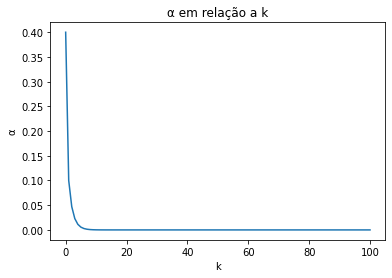

In [11]:
ax = solucao.α.plot(title='α em relação a k')
ax.set_xlabel("k")
ax.set_ylabel("α")

In [12]:
solucao = otimizar(g1, g2, ponto_inicial=0.6)
solucao

,α,f'(α),f''(α)
0,0.6,1.728,1.44
1,-0.6,1.728,-1.44
2,0.6,1.728,1.44
3,-0.6,1.728,-1.44
4,0.6,1.728,1.44
...,...,...,...
96,-1.0,0.000,12.00
97,-1.0,0.000,12.00
98,-1.0,0.000,12.00
99,-1.0,0.000,12.00


Text(0, 0.5, 'α')

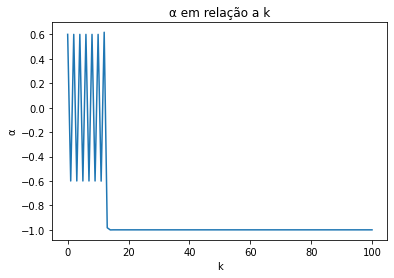

In [14]:
ax = solucao.α.plot(title='α em relação a k')
ax.set_xlabel("k")
ax.set_ylabel("α")